In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC

import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [85]:
df.shape

(614, 13)

In [86]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [88]:
# Deskripsi pada data numerik

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [89]:
# Mengubah tipe data Credit_history menjadi objek

df['Credit_History'] = df['Credit_History'].astype('O')

In [90]:
# Deskripsi pada data kategorikal

df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [91]:
# Menghapus kolom Loan_ID

df.drop('Loan_ID', axis=1, inplace=True)

PREPROCESSING

Missing value


In [92]:
df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
ApplicantIncome,0
CoapplicantIncome,0


In [93]:
# Memisahkan data kategorikal dengan data numerik

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [94]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [95]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [96]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [97]:
# Data Kategorikal
# Mengisi missing value pada suatu kolom dengan nilai yang muncul paling banyak pada kolom tersebut

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data

False

In [98]:
# Data Numerik
# Mengisi missing value dengan nilai pada baris sebelumnya pada kolom yang sama
for i in range(len(num_data.columns)):
    num_data[num_data.columns[i]].fillna(int(num_data[num_data.columns[i]].mean()), inplace=True)

num_data.isnull().sum().any() # no more missing data

False

Label Encoding

In [99]:
# Encoding kolom kategorikal

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [100]:
# Encoding kolom target

target_values = {'Y': 1 , 'N' : 0}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [101]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [102]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [103]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,146.0,360.0,1
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,0
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,1
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,1
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,1


Normalisasi

In [104]:
# Min-Max Normalization
df = (df-df.min())/(df.max()-df.min())
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.070489,0.000000,0.198263,0.74359,1.0
1,1.0,1.0,0.333333,0.0,0.0,1.0,0.0,0.054830,0.036192,0.172214,0.74359,0.0
2,1.0,1.0,0.000000,0.0,1.0,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0
3,1.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.030093,0.056592,0.160637,0.74359,1.0
4,1.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.072356,0.000000,0.191027,0.74359,1.0


Outlier

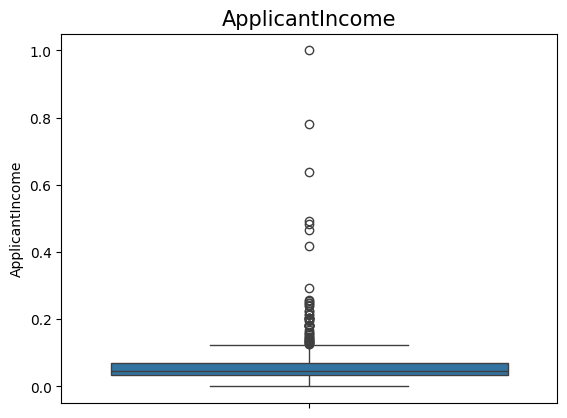

In [105]:
# we will use boxplot to detect outliers

sns.boxplot(df['ApplicantIncome']);
plt.title('ApplicantIncome', fontsize=15);
plt.xlabel('');


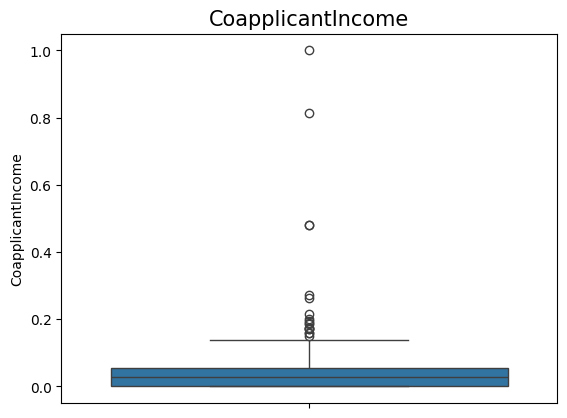

In [106]:
# we will use boxplot to detect outliers

sns.boxplot(df['CoapplicantIncome']);
plt.title('CoapplicantIncome', fontsize=15);
plt.xlabel('');

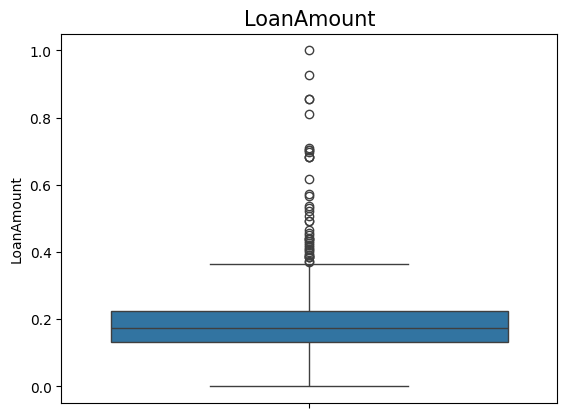

In [107]:
# we will use boxplot to detect outliers

sns.boxplot(df['LoanAmount']);
plt.title('LoanAmount', fontsize=15);
plt.xlabel('');

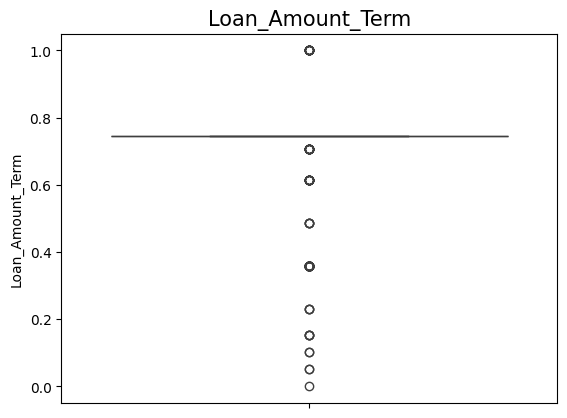

In [108]:
# we will use boxplot to detect outliers

sns.boxplot(df['Loan_Amount_Term']);
plt.title('Loan_Amount_Term', fontsize=15);
plt.xlabel('');

In [109]:
threshold = 1.5
X_out = X['ApplicantIncome']
q25, q75 = np.percentile(X_out, 25), np.percentile(X_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in X_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X, y], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['ApplicantIncome'] > upper) | (data_outliers['ApplicantIncome'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 2880.5 , Quartile 75: 5727.1315074720915
iqr: 2846.6315074720915
Cut Off: 4269.947261208137
Lower: -1389.4472612081372
Upper: 9997.078768680229
Nubers of Outliers: 74
outliers:[12841.0, 12500.0, 11500.0, 10750.0, 13650.0, 11417.0, 14583.0, 10408.0, 23803.0, 10513.0, 20166.0, 14999.0, 11757.0, 14866.0, 10000.0, 39999.0, 51763.0, 33846.0, 39147.0, 12000.0, 11000.0, 10000.0, 16250.0, 14683.0, 11146.0, 14583.0, 20667.0, 20233.0, 10000.0, 15000.0, 63337.0, 19730.0, 15759.0, 81000.0, 14880.0, 12876.0, 10047.0, 10416.0, 37719.0, 16692.0, 16525.0, 16667.0, 10833.0, 18333.0, 17263.0, 20833.0, 13262.0, 17500.0, 11250.0, 18165.0, 10139.0, 19484.0, 16666.0, 16120.0, 12000.0, 11321.851080961513, 13269.657813377491, 11061.031380561944, 22796.54633850213, 19726.116072876957, 10076.364340740736, 11741.682054364494, 12233.789680994807, 10000.0, 11524.013570678617, 18031.337137094244, 12532.75846667893, 10503.859086929462, 16307.525735812927, 10545.30470835094, 16445.53806323933, 19598.4626

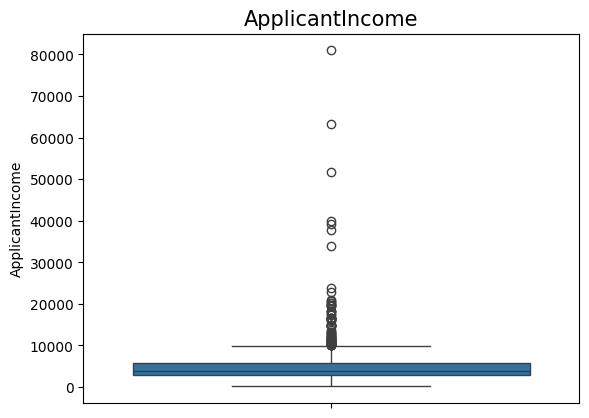

In [110]:
# we will use boxplot to detect outliers

sns.boxplot(X['ApplicantIncome']);
plt.title('ApplicantIncome', fontsize=15);
plt.xlabel('');

Resampling

In [111]:
X = pd.concat([cat_data, num_data], axis=1)
y = target

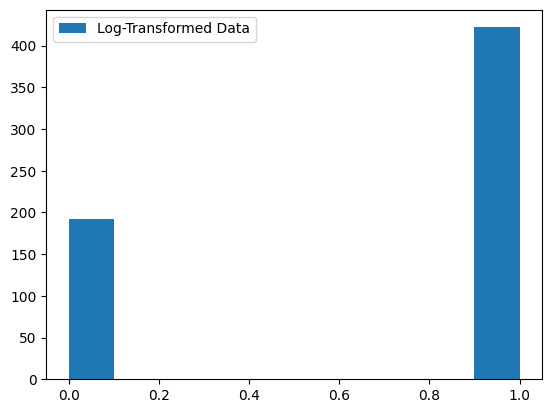

In [112]:
import matplotlib.pyplot as plt

plt.hist(y, label='Log-Transformed Data')
plt.legend()
plt.show()

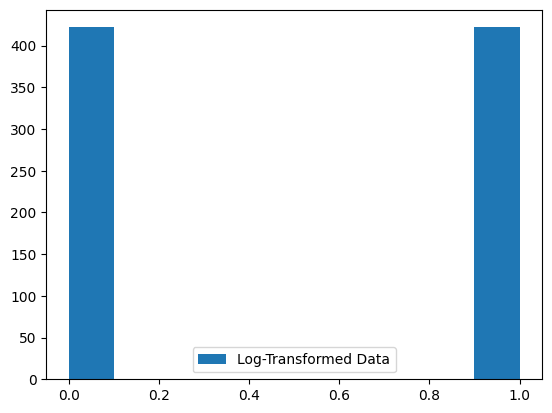

In [113]:
sm = SMOTENC(random_state=42,categorical_features=[0, 6])
X, y = sm.fit_resample(X, y)
plt.hist(y, label='Log-Transformed Data')
plt.legend()
plt.show()

Model GBM

In [114]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (675, 11)
y_train shape (675,)
X_test shape (169, 11)
y_test shape (169,)

ratio of target in y_train : [0.50074074 0.49925926]
ratio of target in y_test : [0.50295858 0.49704142]
ratio of target in original_data : [0.68729642 0.31270358]


In [115]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

model.fit(X_train, y_train)
loss(y, model.predict(X))


  pre: 0.845
  rec: 0.957
  f1: 0.898
  loss: 3.929
  acc: 0.891


Model GBM dengan seleksi fitur MPA

In [116]:
import numpy as np

# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']

    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt.loc[:, x == 1]
    ytrain  = yt.to_numpy().reshape(num_train)  # Solve bug
    xvalid  = xv.loc[:, x == 1]
    yvalid  = yv.to_numpy().reshape(num_valid)  # Solve bug
    # Training
    # mdl     = ExtraTreesClassifier(n_estimators=100, random_state=0)
    # mdl.fit(xtrain, ytrain)
    # # Prediction
    # ypred   = mdl.predict(xvalid)
    # acc     = np.sum(yvalid == ypred) / num_valid
    # error   = 1 - acc
    # Step 3 - Define base models
    # Step 5 - Fit the model
    model.fit(xtrain, ytrain)

    # Step 6 - Make predictions
    y_prediction = model.predict(xvalid)

    # Step 7 - Evaluating accuracy
    accuracy = accuracy_score(yvalid, y_prediction)
    error   = 1 - accuracy
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)

    return cost

In [117]:
#[2012]-"Marine Predator algorithm"

import numpy as np
from numpy.random import rand
import math


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()

    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            sig=1/(1+np.exp(X[i,d]))
            if sig > rand():
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0

    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub

    return x


# Levy Flight
def levy_distribution(beta, dim):
    # Sigma
    nume  = math.gamma(1 + beta) * np.sin(np.pi * beta / 2)
    deno  = math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)
    sigma = (nume / deno) ** (1 / beta)
    # Parameter u & v
    u     = np.random.randn(dim) * sigma
    v     = np.random.randn(dim)
    # Step
    step  = u / abs(v) ** (1 / beta)
    LF    = 0.01 * step

    return LF

# Wavelet Basis
def Wavelet():
  r=rand()
  RW = 2/math.sqrt(3) * (np.pi ** (-1/4)) * (1-r ** 2) * np.exp((-r ** 2)/2)
  return RW

def jfs_MPA(xtrain, ytrain, opts):
    # Parameters
    f = np.asarray(xtrain)
    lb=np.zeros([1,len(f[0])])
    ub=np.zeros([1,len(f[0])])
    for i in range(len(f[0])):
      lb[0,i]=np.min(f[:,i])
      ub[0,i]=np.max(f[:,i])
    thres  = 0.5
    beta   = 1.5    # levy component
    P      = 0.8    # switch probability

    N        = opts['N']
    max_iter = opts['T']
    if 'P' in opts:
        P    = opts['P']
    if 'beta' in opts:
        beta = opts['beta']

    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')

    # Initialize position
    X     = init_position(lb, ub, N, dim)

    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)

    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    Xgb_bin = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    stepsize=np.zeros([N,dim],dtype='float')
    FADs=0.2
    P=0.5
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]

    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0

    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (FPA):", curve[0,t])
    t += 1

    while t < max_iter:
        Elite = np.zeros([N, dim], dtype='float')
        for i in range(N):
          for j in range(dim):
            Elite[i,j]=Xgb[0,j]
        CF=(1-t/max_iter) ** (2*t/max_iter)
        RL=0.05*levy_distribution(beta,dim)
        RB=np.random.randn(dim)
        RW=Wavelet()
        for i in range(N):
          for j in range(dim):
            R=rand()
                # ------------------ Phase 1 (Eq.12) -------------------
            if t<max_iter/3:
                stepsize[i,j]=RB[j]*(Elite[i,j]-RB[j]*X[i,j])
                X[i,j]=X[i,j]+P*R*stepsize[i,j]
                X[i,j]=boundary(X[i,j],lb[0,j],ub[0,j])
                # --------------- Phase 2 (Eqs. 13 & 14)----------------
            elif t < 2*max_iter/3:
              if i>N/2:
                  stepsize[i,j]=RB[j]*(RB[j]*Elite[i,j]-X[i,j])
                  X[i,j]=Elite[i,j]+P*CF*stepsize[i,j]
                  X[i,j]=boundary(X[i,j],lb[0,j],ub[0,j])
              else:
                  stepsize[i,j]=RL[j]*(X[i,j]-RL[j]*X[i,j])
                  X[i,j]=X[i,j]+P*R*stepsize[i,j]
                  X[i,j]=boundary(X[i,j],lb[0,j],ub[0,j])

              #----------------- Phase 3 (Eq. 15)-------------------
            else:
                stepsize[i,j]=RL[j]*(RL[j]*Elite[i,j]-X[i,j]);
                X[i,j]=Elite[i,j]+P*CF*stepsize[i,j];
                X[i,j]=boundary(X[i,j],lb[0,j],ub[0,j])

        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)

        # # Greedy selection
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
                Xgb_bin = Xbin[i,:]

      # ---------- Eddy formation and FADs’ effect (Eq 16) -----------
        if rand()<FADs:
          U=np.zeros([N,dim])
          for i in range(N):
            for j in range(dim):
              index=1
              while index == 1:
                l=rand()
                if l<FADs:
                  U[i,j]=l
                  index=0
                else:
                  index=1
          for i in range(N):
            for j in range(dim):
              X[i,j]=X[i,j]+CF*(lb[0,j]+rand()*(ub[0,j]-lb[0,j])*U[i,j])
        else:
          r=rand();
          perm1=np.random.permutation(N)
          perm2=np.random.permutation(N)
          for i in range(N):
            for j in range(dim):
              stepsize[i,j]=(FADs*(1-r)+r)*(X[perm1[i],j]-X[perm2[i],j])
              X[i,j]=X[i,j]+stepsize[i,j]
        ROBL=rand()*(1-(t/max_iter))
        for i in range(N):
          for j in range(dim):
            X[i,j]=ROBL*(ub[0,j]+lb[0,j]-X[i,j])
            Xgb[0,j]=ROBL*(ub[0,j]+lb[0,j]-Xgb[0,j])
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (FPA):", curve[0,t])
        t += 1


    # Best feature subset
    # Gbin       = binary_conversion(Xgb, thres, 1, dim)
    Gbin       = Xgb_bin
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    fpa_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}

    return fpa_data

Generation: 1
Best (FPA): 0.20098977945131796
Generation: 2
Best (FPA): 0.20098977945131796
Generation: 3
Best (FPA): 0.19109198493813875
Generation: 4
Best (FPA): 0.19109198493813875
Generation: 5
Best (FPA): 0.19109198493813875
Generation: 6
Best (FPA): 0.19109198493813875
Generation: 7
Best (FPA): 0.19109198493813875
Generation: 8
Best (FPA): 0.19109198493813875
Generation: 9
Best (FPA): 0.19109198493813875
Generation: 10
Best (FPA): 0.19109198493813875
Generation: 11
Best (FPA): 0.19109198493813875
Generation: 12
Best (FPA): 0.19109198493813875
Generation: 13
Best (FPA): 0.19109198493813875
Generation: 14
Best (FPA): 0.19109198493813875
Generation: 15
Best (FPA): 0.19109198493813875
Generation: 16
Best (FPA): 0.19109198493813875
Generation: 17
Best (FPA): 0.19109198493813875
Generation: 18
Best (FPA): 0.17351802044109735
Generation: 19
Best (FPA): 0.17351802044109735
Generation: 20
Best (FPA): 0.17351802044109735
Generation: 21
Best (FPA): 0.17351802044109735
Generation: 22
Best (F

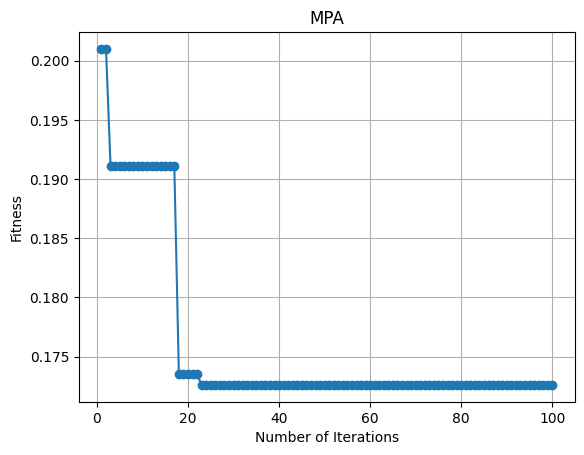

In [119]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# load data
# data  = pd.read_csv('ionosphere.csv')
# data  = data.values

# feat  = np.asarray(df_max_scaled[:, 0:-1])
# label = np.asarray(df_max_scaled[:, -1])

# split data into train & validation (70 -- 30)
# xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
# oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = oversampler.fit_resample(xtrain, ytrain)
# fold = {'xt':X_resampled, 'yt':y_resampled, 'xv':xtest, 'yv':ytest}
# fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}
fold = {'xt':X_train, 'yt':y_train, 'xv':X_test, 'yv':y_test}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 100   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

# perform feature selection
fmdl = jfs_MPA(X_train, y_train, opts)
sf   = fmdl['sf']

selected_features = sf.tolist()
num_train = np.size(X_train, 0)
num_valid = np.size(X_test, 0)
x_train   = X_train.iloc[:, selected_features] # Use iloc for integer-based indexing
y_train   = y_train.to_numpy().reshape(num_train)
x_valid   = X_test.iloc[:, selected_features]
y_valid   = y_test.to_numpy().reshape(num_valid)

# # model with selected features
# num_train = np.size(X_train, 0)
# num_valid = np.size(X_test, 0)
# x_train   = X_train[:, sf]
# y_train   = y_train.reshape(num_train)  # Solve bug
# x_valid   = X_test[:, sf]
# y_valid   = y_test.reshape(num_valid)  # Solve bug

model.fit(x_train, y_train)

# accuracy
y_pred    = model.predict(x_valid)
# Acc       = np.sum(y_valid == y_pred)  / num_valid
# print("Accuracy:", 100 * Acc)
loss(y_valid, y_pred)
# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

count=1
for i in fmdl['sf']:
  print("selected feature",count,":",X.columns[i])
  count+=1
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('MPA')
ax.grid()
plt.show()